# Anomaly Detection

## Method 1 - K-Nearest Neighbor

In [16]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.neighbors import NearestNeighbors
from pyod.models.iforest import IForest

In [4]:
iris_data = load_iris()
print(iris_data.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

In [5]:

df = pd.DataFrame(iris_data.data[:,:2], # getting all rows with first 2 columns
                  columns=['sepal length', 'sepal width']
                  )

In [6]:
df.head()

,sepal length,sepal width
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6


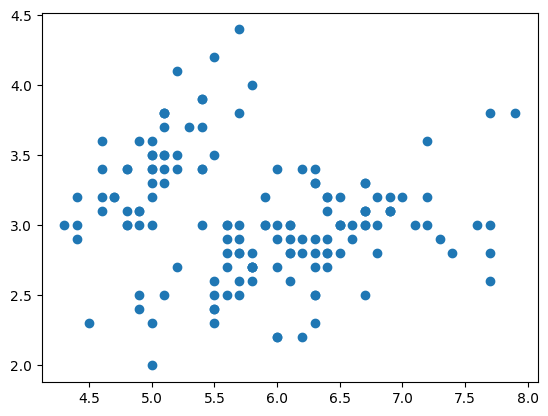

In [7]:
plt.scatter(df['sepal length'], df['sepal width'])

In [8]:
KNN = NearestNeighbors(n_neighbors=3) #hyperparameter that needs to be tuned

KNN.fit(df)

NearestNeighbors(n_neighbors=3)

### Run An Evaluation For The Optimal Threshold To Spot Outliers

- calculate the distances between data points and indexes of nearest neighbors (from the model output)
- Calculate the mean of the k-distances for each row/observation
- Plot the data
- Determine the cutoff based on the outlier value

In [9]:
distances, indices = KNN.kneighbors(df)

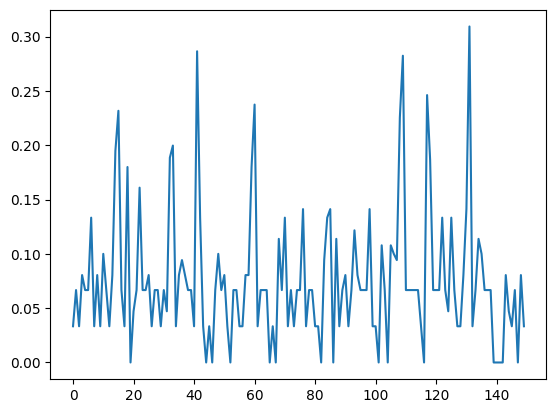

In [10]:
plt.plot(distances.mean(axis=1))

- the method looks for the data points that have the highest avg distances from every other points
- these are the anomalies
- every spike in the graph above represent an anomaly

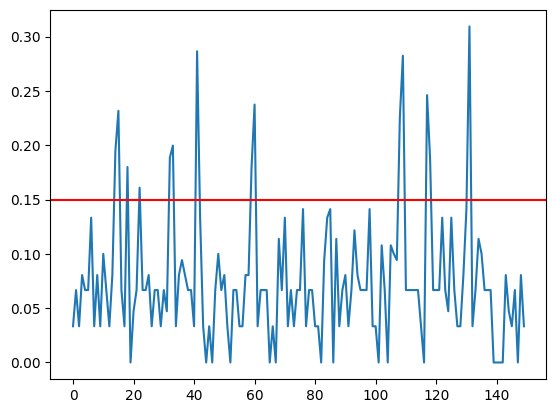

In [11]:
# plot a threshold value

plt.plot(distances.mean(axis=1))
plt.axhline(y=0.15, color='red')

- looks like 0.15 is a good threshhold to split the anomalies from the normal data points
- we can get the index values of said anomalies using the threshold

In [12]:
anomaly_index = np.where(distances.mean(axis=1) > 0.15)
anomaly_index #index locations of the anomalies

(array([ 14,  15,  18,  22,  32,  33,  41,  59,  60, 108, 109, 117, 118,
        131], dtype=int64),)

In [13]:
anomaly_df = df.iloc[anomaly_index]
anomaly_df

,sepal length,sepal width
14,5.8,4.0
15,5.7,4.4
18,5.7,3.8
22,4.6,3.6
32,5.2,4.1
33,5.5,4.2
41,4.5,2.3
59,5.2,2.7
60,5.0,2.0
108,6.7,2.5


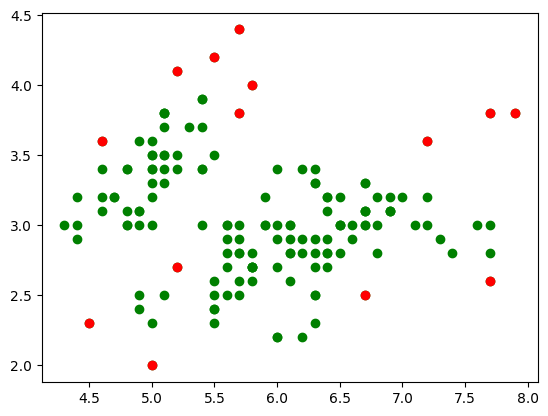

In [14]:
plt.scatter(df['sepal length'], df['sepal width'], color='green')
plt.scatter(anomaly_df['sepal length'], anomaly_df['sepal width'], color='red')


# Anomoly detection using PyDD 
- PyDD is a very useful and comprehensive anomaly (outlier) detection library (Python Outlier Detection)
It has 25 outler detection algos, and we'll look at two of them: 
    - Isolation forest (IForest)
    - Angle based outlier detection (ABOD). Uses angles between pairs of datapoints to measure variance of angles measured between each data point and all other data points

In [15]:
x = iris_data.data

#standardize the data 
ss = StandardScaler()
x_scaled = ss.fit_transform(x)

In [21]:
#for visualization purposes 
pca = PCA(n_components=2)
x_pca = pca.fit_transform(x_scaled)

## IForest Example 

In [22]:
#deploy the model 
model = IForest(contamination=0.12,random_state=10)

In [23]:
model.fit(x_scaled)

#outlier prediction 
y_pred = model.predict(x_scaled)

Text(0, 0.5, 'Principle Component 2')

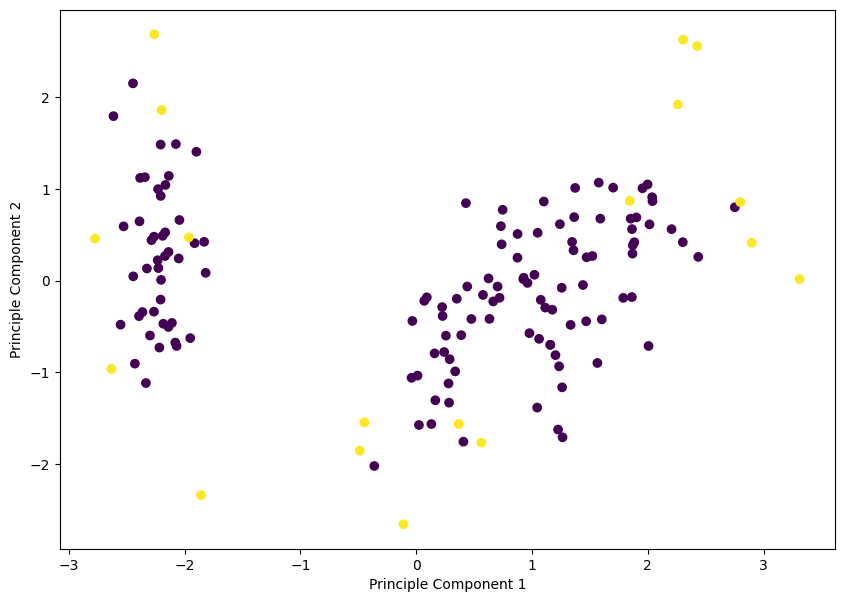

In [26]:
#visualize the outliers 
plt.figure(figsize=(10,7))

plt.scatter(x_pca[:,0], #PC 1
              x_pca[:,1], #PC 2
              c=y_pred)

plt.xlabel("Principle Component 1")
plt.ylabel("Principle Component 2")